In [1]:
import sys
sys.path.insert(1, '../functions')

import vtk_functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()

# Geometric measurements 

In [2]:
df = pd.read_csv("sphere_measurements.csv")
df["pe_vol"] = abs(df["vol_estimate"] - df["vol_real"]) / df["vol_real"] *  100
df["pe_sa"] = abs(df["sa_estimate"] - df["sa_real"]) / df["sa_real"] *  100

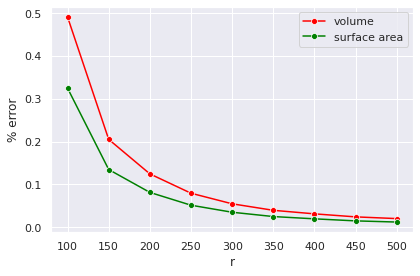

In [3]:
ax = sns.lineplot(x="r", y="pe_vol", data=df, label="volume", marker="o", color="red")
ax = sns.lineplot(x="r", y="pe_sa", data=df, label="surface area", marker="o", color="green")
ax.set(ylabel="% error")
plt.legend()
plt.tight_layout()
plt.savefig("figures/pe_measurements.pdf")

# H assesment

In [8]:
# Read polydata
pd_sphere_og = vtk_functions.read_ply("/home/steven/scriptie/inputs/meshes/sphere_r_100_p_20.ply")
pd_sphere_perfect = vtk_functions.read_ply("/home/steven/scriptie/inputs/meshes/sphere_r_100_perfect.ply")
pd_sphere_mlx = vtk_functions.read_ply("/home/steven/scriptie/inputs/meshes/sphere_r_100_p_20_MLX.ply")

# Convert polydata to corresponding array of H values
curv_og = vtk_functions.pd_to_curv_arr(pd_sphere_og)
curv_perfect = vtk_functions.pd_to_curv_arr(pd_sphere_perfect)
curv_mlx = vtk_functions.pd_to_curv_arr(pd_sphere_mlx)

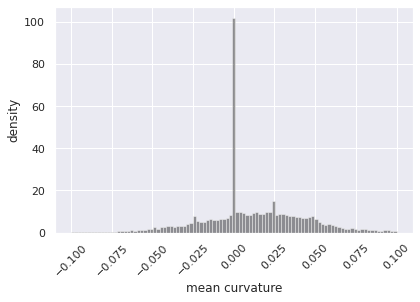

In [13]:
def plot(vals):
    sns.distplot(vals, bins=np.linspace(-0.1, 0.1, 100), color="black", kde=False, norm_hist=True)

    plt.xlabel("mean curvature")
    plt.ylabel("density")
    plt.tight_layout()
    plt.xticks(rotation=45)
    
plot(curv_og)
plt.savefig("figures/sphere_og_H_dist.png", bbox_inches="tight", pad_inches=0)
plt.show()